In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib

In [2]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
plt.style.use('ggplot')
pd.set_option('display.float_format', lambda x: '%.2f' % x)
MODEL_DIR = 'models'
os.makedirs(MODEL_DIR, exist_ok=True)

In [4]:
DATA_PATH = 'data/company_fundamentals.csv'
df = pd.read_csv(DATA_PATH)
print("Data loaded.")

Data loaded.


In [5]:
display(df.head())

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.33,7.92,259.77,175.49,138721055226.00,9048000000.00,4.39,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.15,1.70,68.39,48.92,10783419933.00,601000000.00,3.58,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.91,0.26,64.60,42.28,102121042306.00,5744000000.00,3.74,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.50,3.29,125.86,60.05,181386347059.00,10310000000.00,6.29,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.71,5.44,162.60,114.82,98765855553.00,5643228000.00,2.60,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [6]:
display(df.tail())


,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
500,XYL,Xylem Inc.,Industrials,70.24,30.94,1.17,1.83,76.81,46.86,12915021000.00,722000000.00,2.73,5.31,http://www.sec.gov/cgi-bin/browse-edgar?action...
501,YUM,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.80,4.07,86.93,62.85,27003303098.00,2289000000.00,6.31,212.08,http://www.sec.gov/cgi-bin/browse-edgar?action...
502,ZBH,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.79,9.01,133.49,108.17,24454698119.00,2007400000.00,3.16,2.39,http://www.sec.gov/cgi-bin/browse-edgar?action...
503,ZION,Zions Bancorp,Financials,50.71,17.73,1.48,2.60,55.61,38.43,10670678640.00,0.00,3.79,1.42,http://www.sec.gov/cgi-bin/browse-edgar?action...
504,ZTS,Zoetis,Health Care,71.51,32.80,0.68,1.65,80.13,52.00,35991109776.00,1734000000.00,9.28,18.09,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [7]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Symbol          505 non-null    object 
 1   Name            505 non-null    object 
 2   Sector          505 non-null    object 
 3   Price           505 non-null    float64
 4   Price/Earnings  503 non-null    float64
 5   Dividend Yield  505 non-null    float64
 6   Earnings/Share  505 non-null    float64
 7   52 Week Low     505 non-null    float64
 8   52 Week High    505 non-null    float64
 9   Market Cap      505 non-null    float64
 10  EBITDA          505 non-null    float64
 11  Price/Sales     505 non-null    float64
 12  Price/Book      497 non-null    float64
 13  SEC Filings     505 non-null    object 
dtypes: float64(10), object(4)
memory usage: 55.4+ KB
None


In [8]:
display(df.describe(include='object'))


,Symbol,Name,Sector,SEC Filings
count,505,505,505,505
unique,505,505,11,505
top,MMM,3M Company,Consumer Discretionary,http://www.sec.gov/cgi-bin/browse-edgar?action...
freq,1,1,84,1


In [9]:
display(df.describe())

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
count,505.00,503.00,505.00,505.00,505.00,505.00,505.00,505.00,505.00,497.00
mean,103.83,24.81,1.90,3.75,122.62,83.54,49239436929.50,3590328130.36,3.94,14.45
std,134.43,41.24,1.54,5.69,155.36,105.73,90050171072.14,6840543516.45,3.46,89.66
min,2.82,-251.53,0.00,-28.01,6.59,2.80,2626102121.00,-5067000000.00,0.15,0.51
25%,46.25,15.35,0.79,1.49,56.25,38.43,12732072001.00,773932000.00,1.63,2.02
50%,73.92,19.45,1.77,2.89,86.68,62.85,21400952517.00,1614399000.00,2.90,3.40
75%,116.54,25.75,2.78,5.14,140.13,96.66,45119684067.00,3692749000.00,4.70,6.11
max,1806.06,520.15,12.66,44.09,2067.99,1589.00,809508034020.00,79386000000.00,20.09,1403.38


In [10]:
features = ['Price', 'Price/Earnings', 'Earnings/Share', 'Market Cap', 'EBITDA']
print(f"Features for Clustering: {features}")

Features for Clustering: ['Price', 'Price/Earnings', 'Earnings/Share', 'Market Cap', 'EBITDA']


In [11]:
print(df[features].isnull().sum())

Price             0
Price/Earnings    2
Earnings/Share    0
Market Cap        0
EBITDA            0
dtype: int64


In [12]:
df_filled = df.copy()


In [13]:
for col in features:
    if col in df_filled.columns:
        df_filled[col] = df_filled[col].fillna(df_filled[col].mean())
print("Nulls imputed.")

Nulls imputed.


In [14]:
def parse_market_cap(x):
    if isinstance(x, str):
        if 'B' in x: return float(x.replace('B', '')) * 1e9
        if 'M' in x: return float(x.replace('M', '')) * 1e6
    return x

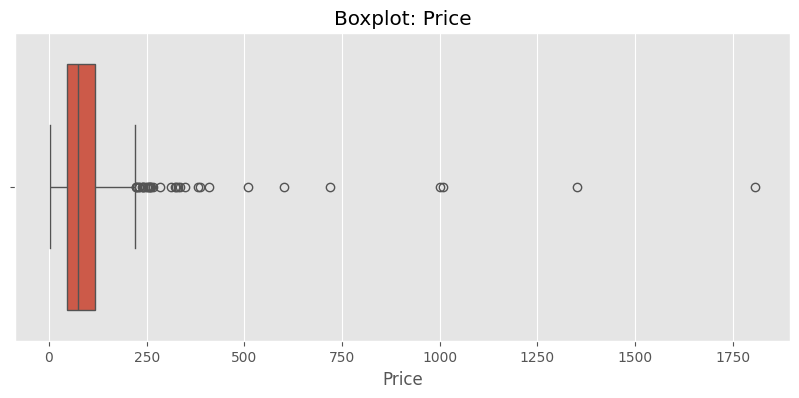

In [15]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_filled['Price'])
plt.title('Boxplot: Price')
plt.show()

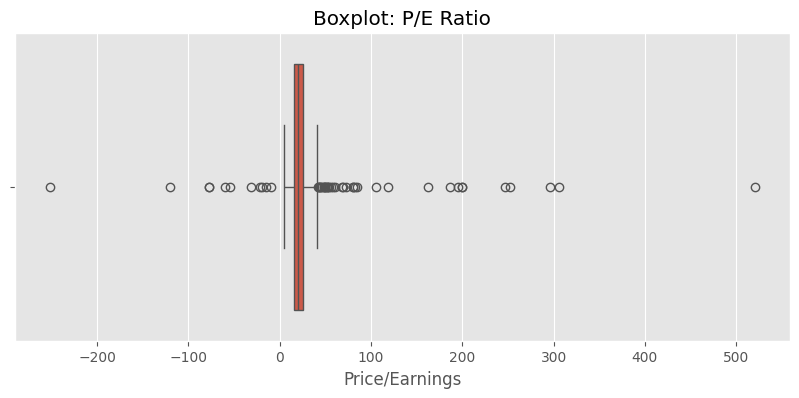

In [16]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_filled['Price/Earnings'])
plt.title('Boxplot: P/E Ratio')
plt.show()

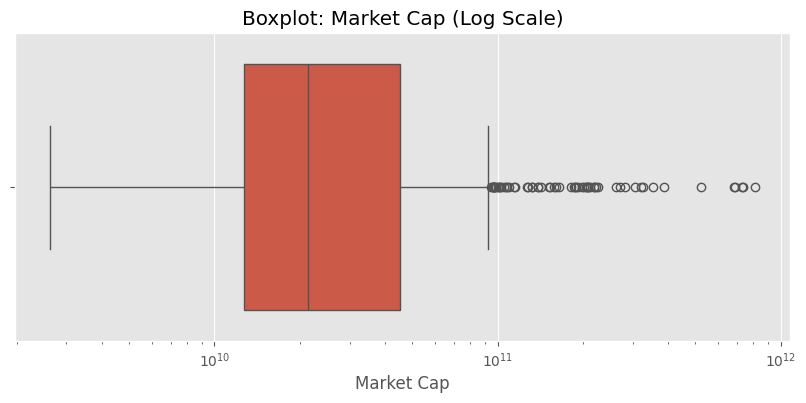

In [17]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_filled['Market Cap'])
plt.xscale('log')
plt.title('Boxplot: Market Cap (Log Scale)')
plt.show()

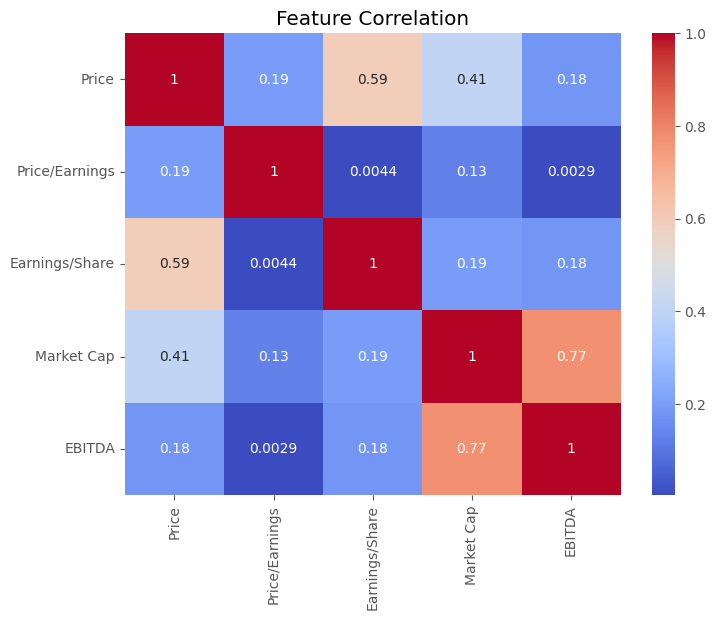

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_filled[features].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

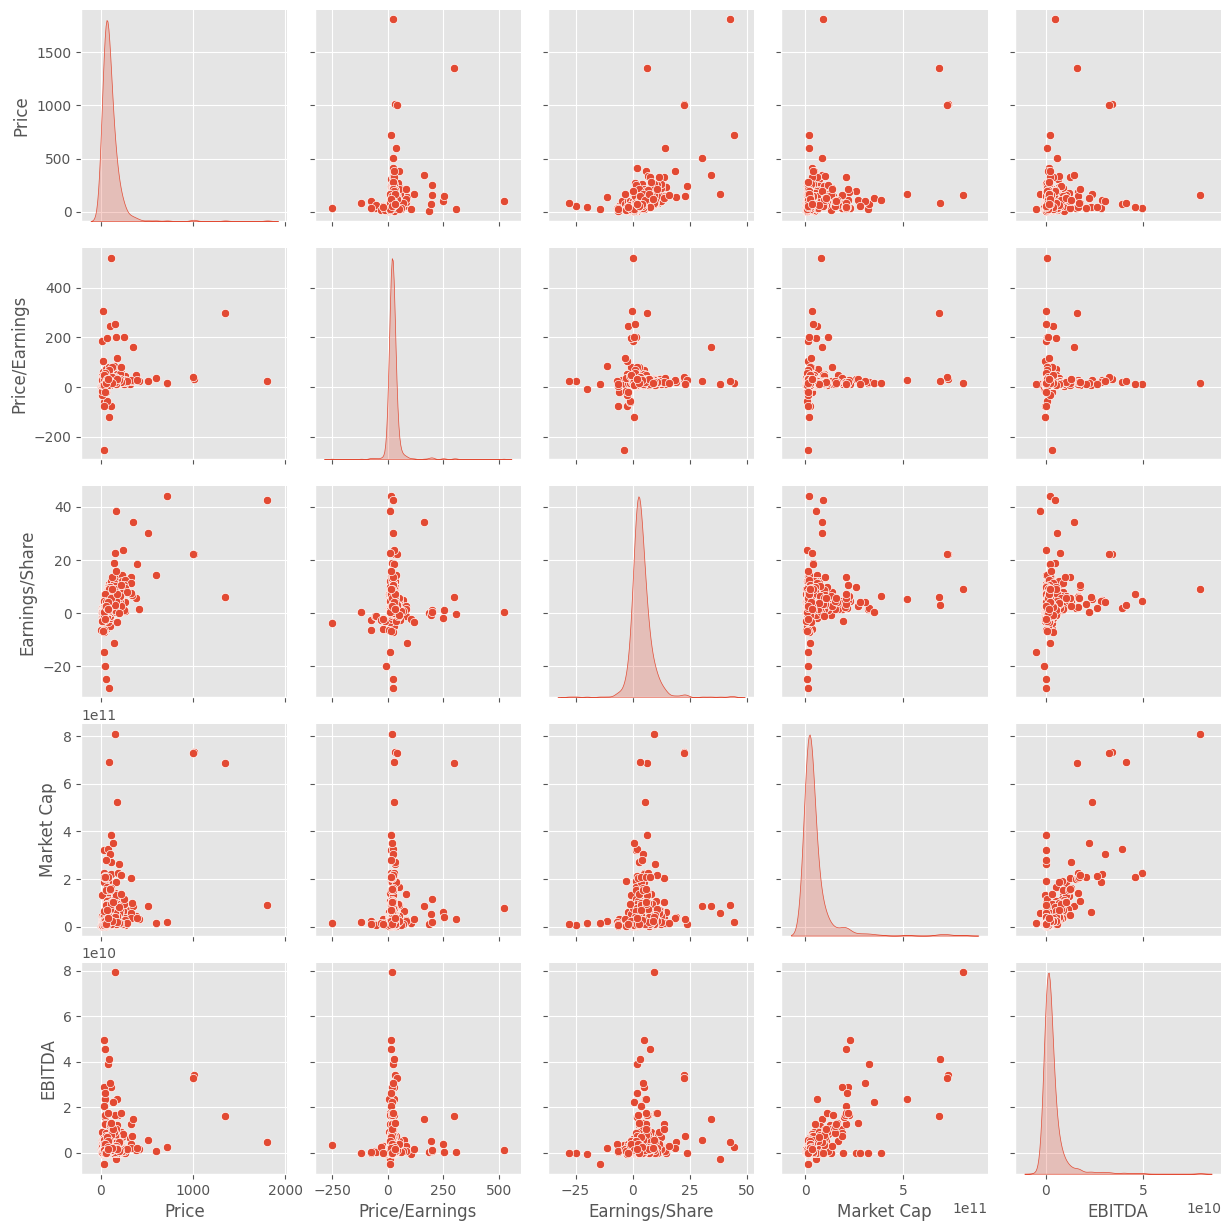

In [19]:
sns.pairplot(df_filled[features], diag_kind='kde')
plt.show()

In [20]:
def cap_outliers(series, lower=0.01, upper=0.99):
    l_lim = series.quantile(lower)
    u_lim = series.quantile(upper)
    return series.clip(lower=l_lim, upper=u_lim)

In [21]:
df_clean = df_filled.copy()
for col in features:
    df_clean[col] = cap_outliers(df_clean[col])

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[features])

In [23]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

Explained Variance Ratio: [0.44702332 0.24849958]


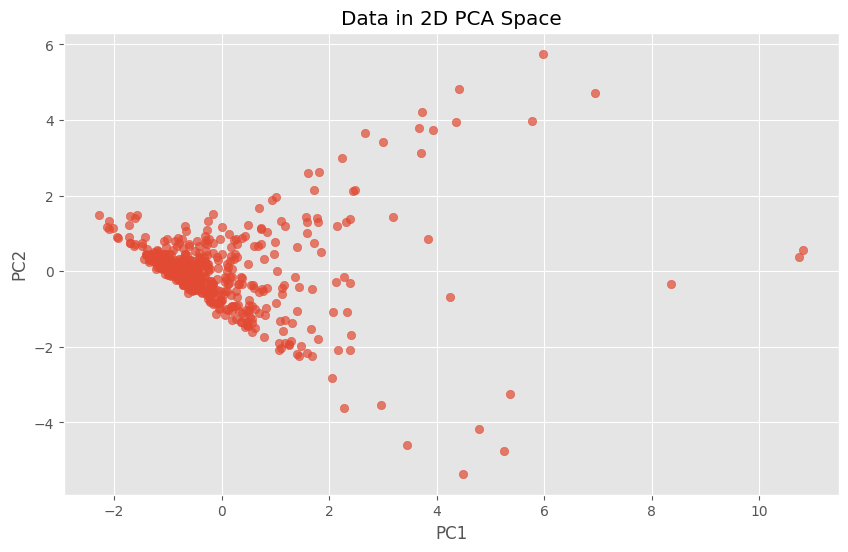

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.7)
plt.title('Data in 2D PCA Space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [25]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

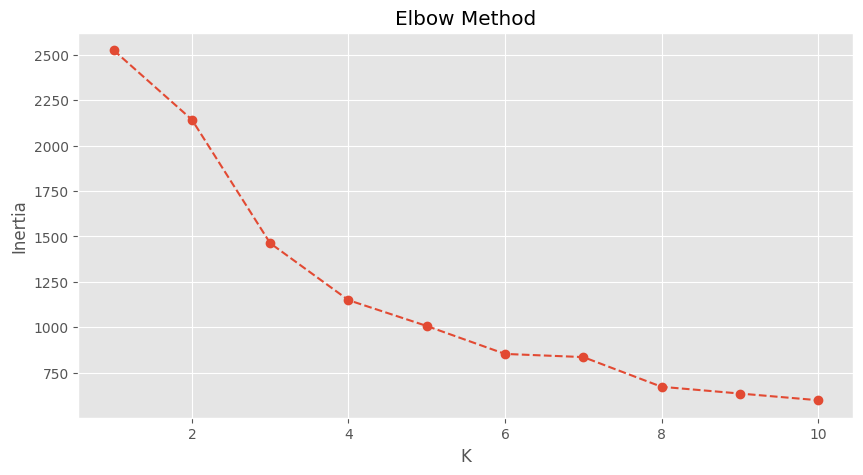

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [27]:
sil_scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

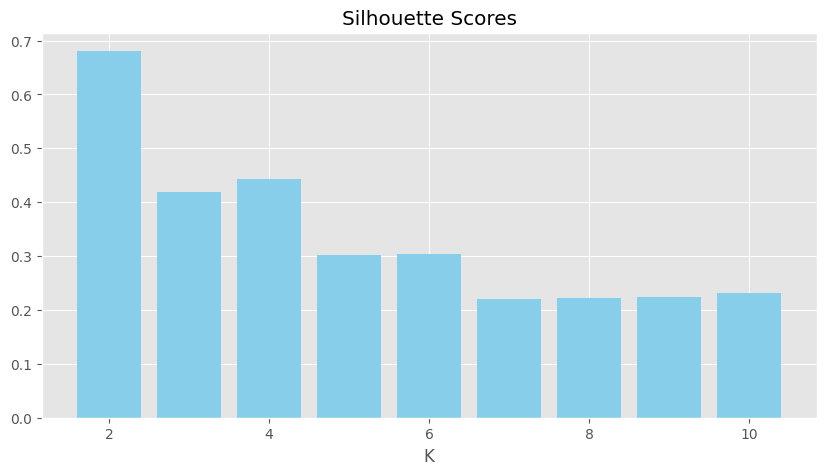

In [28]:
plt.figure(figsize=(10, 5))
plt.bar(range(2, 11), sil_scores, color='skyblue')
plt.title('Silhouette Scores')
plt.xlabel('K')
plt.show()

In [30]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_km = kmeans.fit_predict(X_scaled)

In [31]:
df_clean['Cluster_KM'] = clusters_km
print(df_clean['Cluster_KM'].value_counts())

Cluster_KM
2    385
0     96
1     24
Name: count, dtype: int64


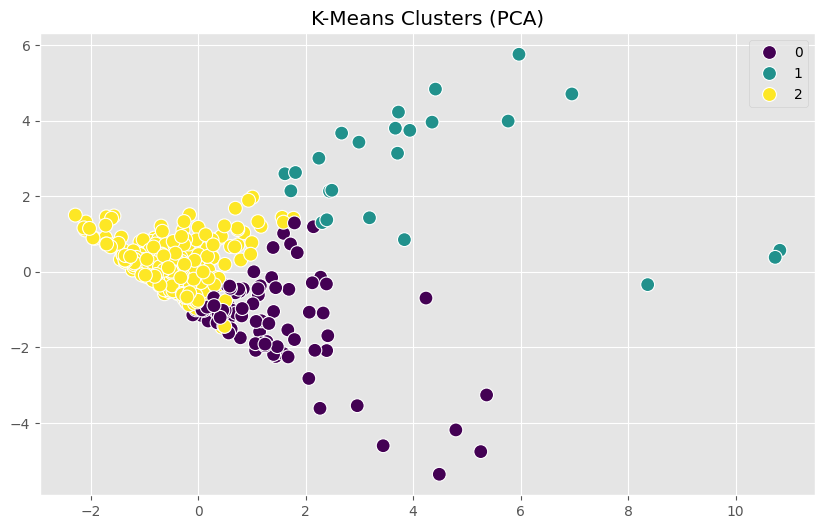

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters_km, palette='viridis', s=100)
plt.title('K-Means Clusters (PCA)')
plt.show()

In [33]:
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
display(centroids)

,Price,Price/Earnings,Earnings/Share,Market Cap,EBITDA
0,207.60,26.42,9.46,52728185287.81,3389545656.25
1,157.97,28.02,6.26,302615888250.66,23805095000.00
2,67.09,23.42,2.16,29826340764.44,2181974874.89


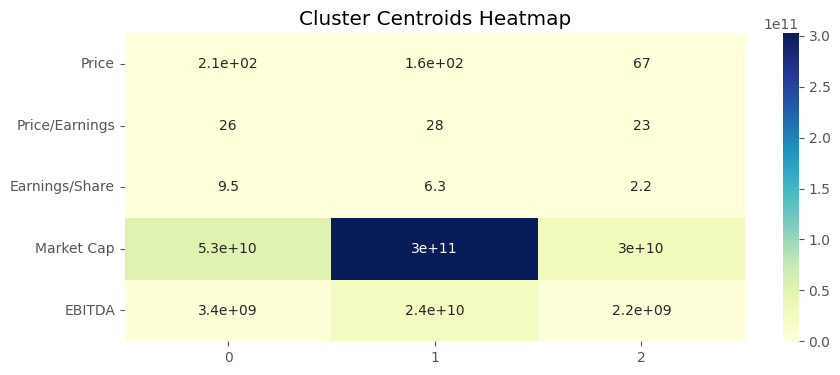

In [34]:
plt.figure(figsize=(10, 4))
sns.heatmap(centroids.T, annot=True, cmap='YlGnBu')
plt.title('Cluster Centroids Heatmap')
plt.show()

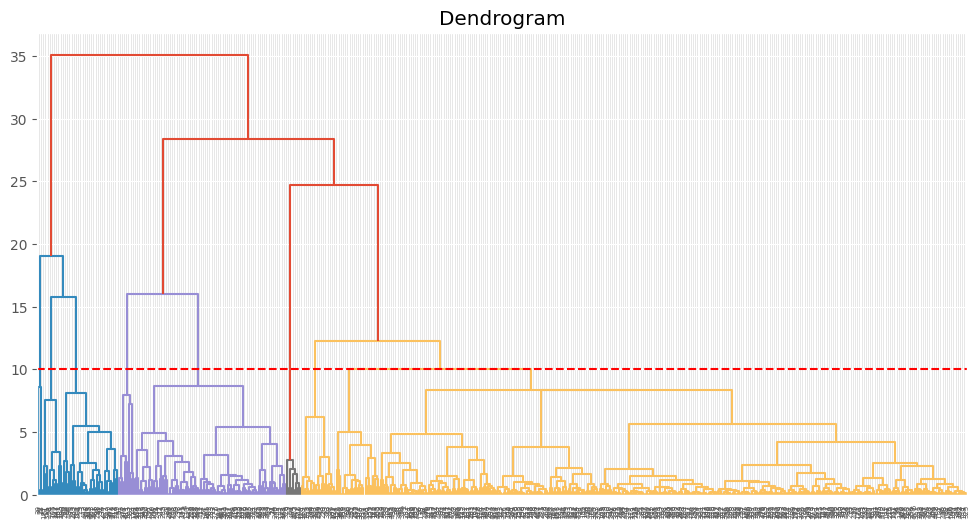

In [35]:
plt.figure(figsize=(12, 6))
dendro = linkage(X_scaled, method='ward')
dendrogram(dendro)
plt.title('Dendrogram')
plt.axhline(y=10, color='r', linestyle='--')
plt.show()

In [36]:
agg = AgglomerativeClustering(n_clusters=3)
clusters_agg = agg.fit_predict(X_scaled)
df_clean['Cluster_Agg'] = clusters_agg

In [37]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_db = dbscan.fit_predict(X_scaled)
df_clean['Cluster_DB'] = clusters_db

In [38]:
print("DBSCAN Cluster Counts (-1 is noise):")
print(df_clean['Cluster_DB'].value_counts())

DBSCAN Cluster Counts (-1 is noise):
Cluster_DB
 0    349
-1    156
Name: count, dtype: int64


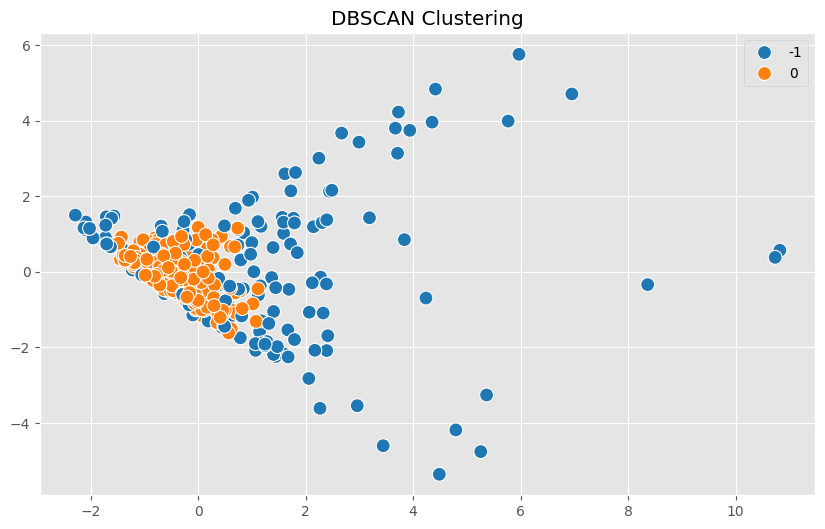

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters_db, palette='tab10', s=100)
plt.title('DBSCAN Clustering')
plt.show()

In [40]:
score_km = davies_bouldin_score(X_scaled, clusters_km)
score_agg = davies_bouldin_score(X_scaled, clusters_agg)
print(f"DB Index K-Means: {score_km:.4f}")
print(f"DB Index Agglomerative: {score_agg:.4f}")

DB Index K-Means: 1.0943
DB Index Agglomerative: 1.1079


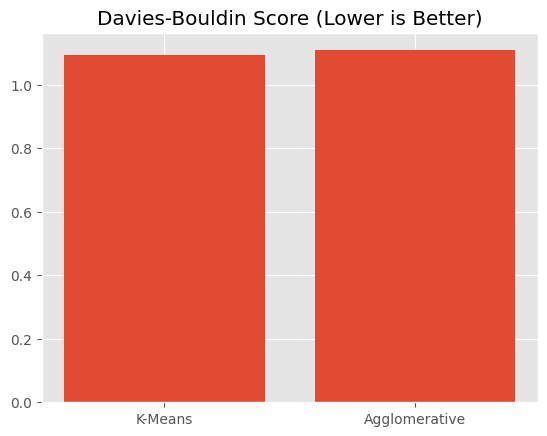

In [41]:

plt.bar(['K-Means', 'Agglomerative'], [score_km, score_agg])
plt.title('Davies-Bouldin Score (Lower is Better)')
plt.show()

In [42]:
print("Cluster 0 Analysis:")
display(df_clean[df_clean['Cluster_KM']==0].describe())

Cluster 0 Analysis:


,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,Cluster_KM,Cluster_Agg,Cluster_DB
count,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,94.00,96.00,96.00,96.00
mean,207.60,26.42,1.41,9.46,260.53,174.90,52728185287.81,3389545656.25,4.56,12.18,0.00,1.88,-0.64
std,104.66,25.33,1.15,5.21,223.45,164.87,46735001120.15,3636178245.62,4.13,28.14,0.00,0.39,0.48
min,74.51,8.16,0.00,0.80,89.54,60.69,4653993594.00,-371216000.00,0.15,0.83,0.00,0.00,-1.00
25%,150.44,17.54,0.31,6.36,169.72,113.62,18647381164.75,997119750.00,1.86,2.69,0.00,2.00,-1.00
50%,178.67,21.41,1.40,8.37,215.22,146.52,38317063321.50,2117644500.00,3.13,3.91,0.00,2.00,-1.00
75%,239.60,26.55,2.11,11.15,278.56,187.25,69283589262.75,4740575000.00,5.61,8.02,0.00,2.00,0.00
max,597.34,200.07,5.04,23.67,2067.99,1589.00,261401203633.00,17590000000.00,20.09,182.86,0.00,2.00,0.00


In [43]:
print("Cluster 1 Analysis:")
display(df_clean[df_clean['Cluster_KM']==1].describe())

Cluster 1 Analysis:


,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,Cluster_KM,Cluster_Agg,Cluster_DB
count,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00
mean,157.97,28.02,2.31,6.26,257.94,170.07,302615888250.66,23805095000.00,4.20,8.60,1.00,1.00,-1.00
std,177.25,37.51,1.55,5.48,407.91,251.56,142771559226.68,9065167122.35,3.53,16.75,0.00,0.00,0.00
min,33.63,6.58,0.00,0.39,39.43,30.36,61536606173.00,0.00,0.56,1.33,1.00,1.00,-1.00
25%,45.82,14.84,1.50,2.93,52.57,38.70,207648943607.75,16554000000.00,1.74,2.96,1.00,1.00,-1.00
50%,103.95,19.63,1.98,5.12,113.67,80.87,225045951664.50,23582500000.00,3.36,4.28,1.00,1.00,-1.00
75%,159.26,27.61,3.66,6.34,185.92,133.53,419447873138.24,33074720000.00,5.31,7.24,1.00,1.00,-1.00
max,597.34,200.07,5.42,22.27,1498.00,824.30,517950659552.96,34156880000.00,14.43,84.08,1.00,1.00,-1.00


In [44]:
print("Cluster 2 Analysis:")
display(df_clean[df_clean['Cluster_KM']==2].describe())

Cluster 2 Analysis:


,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,Cluster_KM,Cluster_Agg,Cluster_DB
count,385.00,385.00,385.00,385.00,385.00,385.00,385.00,385.00,385.00,379.00,385.00,385.00,385.00
mean,67.09,23.42,1.99,2.16,79.80,55.36,29826340764.44,2181974874.89,3.77,15.39,2.00,0.06,-0.18
std,35.32,28.84,1.60,2.53,40.30,28.37,35809997906.84,2356900307.07,3.26,101.65,0.00,0.28,0.39
min,12.83,-53.61,0.00,-6.87,6.59,2.80,4230379820.88,-371216000.00,0.17,0.51,2.00,0.00,-1.00
25%,40.05,14.84,0.86,1.12,48.62,33.75,11596117445.00,701190000.00,1.58,1.95,2.00,0.00,0.00
50%,62.49,19.14,1.83,2.31,73.10,51.96,18027633617.00,1454000000.00,2.84,3.15,2.00,0.00,0.00
75%,91.33,25.12,2.93,3.72,105.36,73.81,32995712852.00,2815000000.00,4.66,5.83,2.00,0.00,0.00
max,191.79,200.07,12.66,9.24,220.20,158.80,321478200969.00,12843000000.00,17.03,1403.38,2.00,2.00,0.00


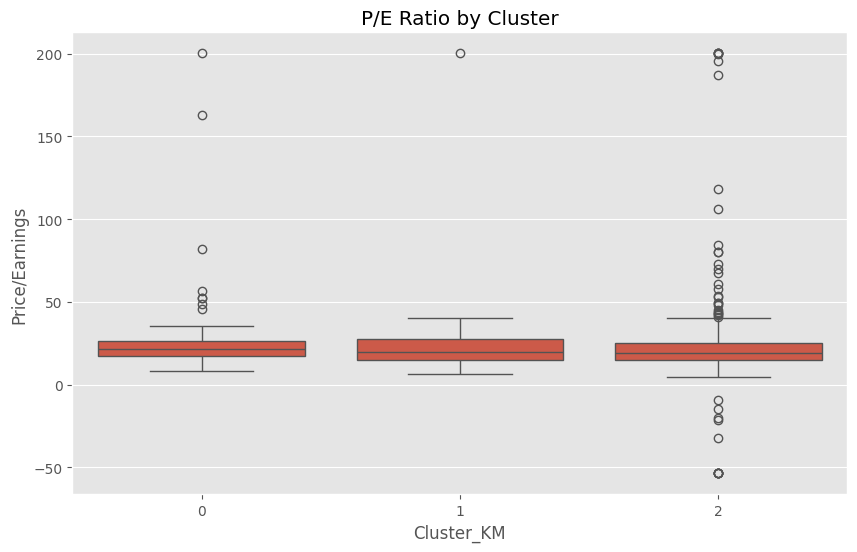

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster_KM', y='Price/Earnings', data=df_clean)
plt.title('P/E Ratio by Cluster')
plt.show()

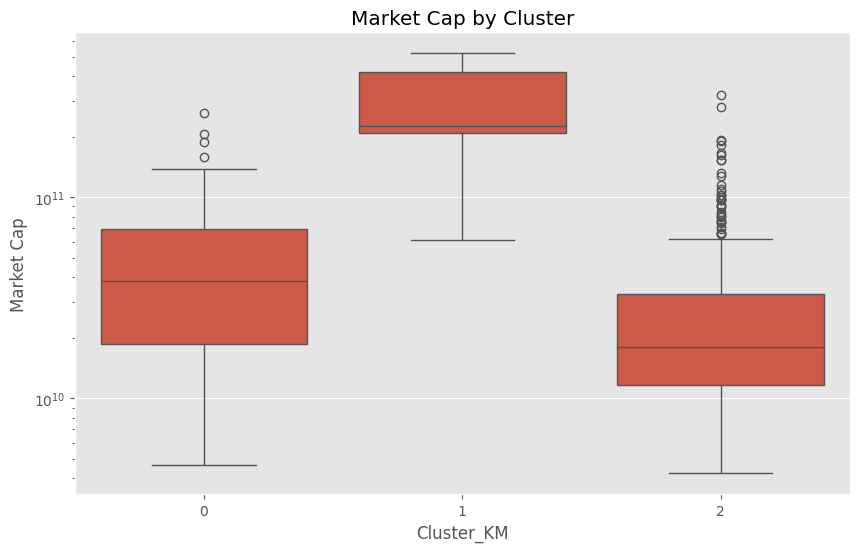

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster_KM', y='Market Cap', data=df_clean)
plt.title('Market Cap by Cluster')
plt.yscale('log')
plt.show()

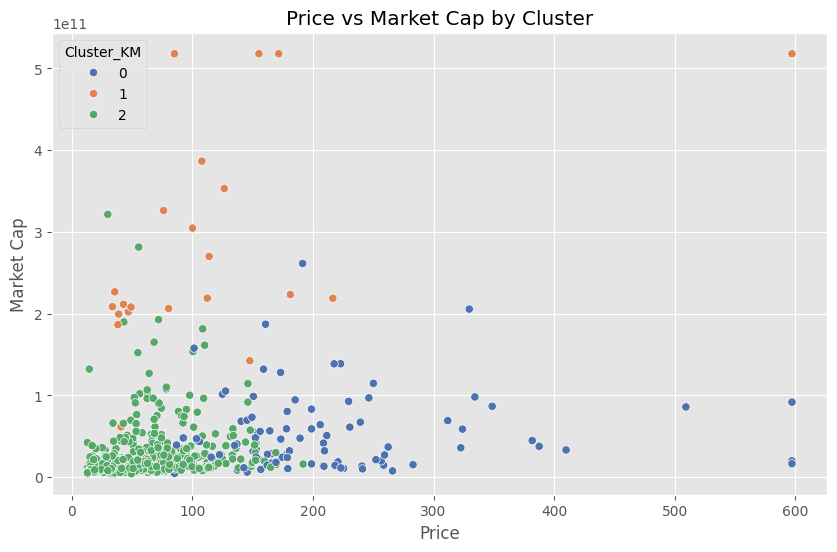

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Market Cap', hue='Cluster_KM', data=df_clean, palette='deep')
plt.title('Price vs Market Cap by Cluster')
plt.show()

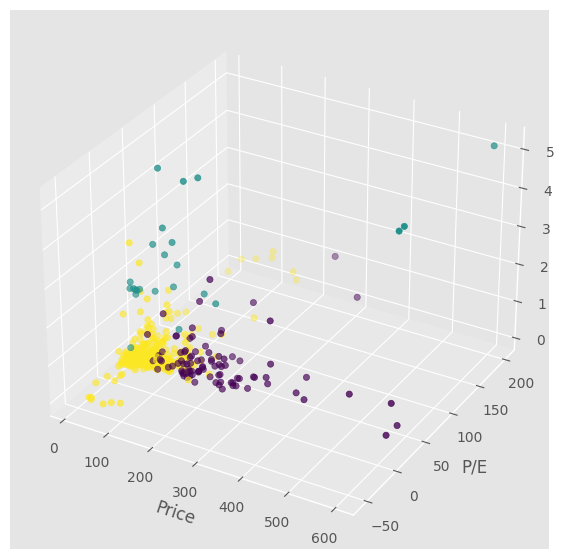

In [48]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_clean['Price'], df_clean['Price/Earnings'], df_clean['Market Cap'], c=clusters_km, cmap='viridis')
ax.set_xlabel('Price')
ax.set_ylabel('P/E')
ax.set_zlabel('Market Cap')
plt.show()

In [49]:
joblib.dump(kmeans, f'{MODEL_DIR}/fund_kmeans_model.pkl')

['models/fund_kmeans_model.pkl']

In [50]:
joblib.dump(scaler, f'{MODEL_DIR}/fund_scaler.pkl')

['models/fund_scaler.pkl']

In [52]:
joblib.dump(pca, f'{MODEL_DIR}/fund_pca.pkl')

['models/fund_pca.pkl']

In [53]:
joblib.dump(agg, f'{MODEL_DIR}/fund_agg_model.pkl')

['models/fund_agg_model.pkl']

In [54]:
df_clean.to_csv('data/companies_clustered.csv', index=False)
print("CSV Saved.")

CSV Saved.


In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, clusters_km)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


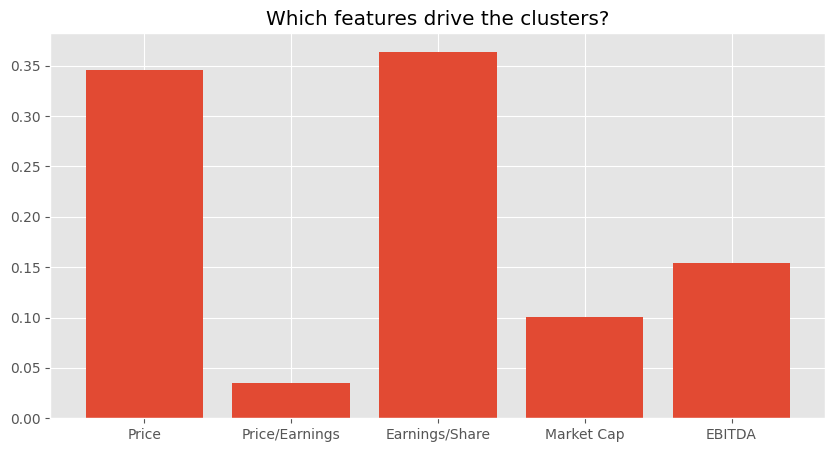

In [56]:
plt.figure(figsize=(10, 5))
plt.bar(features, rf.feature_importances_)
plt.title('Which features drive the clusters?')
plt.show()

In [57]:
def name_cluster(c_id):
    if c_id == 0: return "Blue Chip / Stable"
    if c_id == 1: return "High Growth / Volatile"
    return "Undervalued / Small Cap"

In [58]:
df_clean['Cluster_Name'] = df_clean['Cluster_KM'].apply(name_cluster)

In [59]:
print(df_clean[['Cluster_KM', 'Cluster_Name']].value_counts())

Cluster_KM  Cluster_Name           
2           Undervalued / Small Cap    385
0           Blue Chip / Stable          96
1           High Growth / Volatile      24
Name: count, dtype: int64


In [60]:
df_clean.to_csv('data/companies_clustered_named.csv', index=False)

In [61]:
r_scaler = RobustScaler()
X_rob = r_scaler.fit_transform(df_clean[features])
km_rob = KMeans(n_clusters=3).fit(X_rob)
print("Robust Scaler Inertia:", km_rob.inertia_)

Robust Scaler Inertia: 4398.027953477062


In [62]:
print("Standard Scaler Inertia:", kmeans.inertia_)

Standard Scaler Inertia: 1462.4742193725226


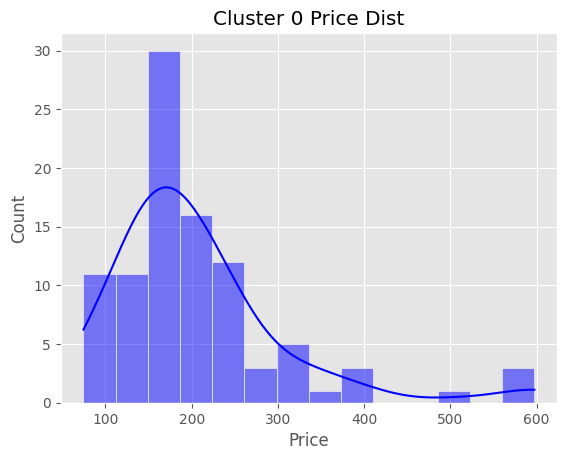

In [63]:
sns.histplot(df_clean[df_clean['Cluster_KM']==0]['Price'], kde=True, color='blue')
plt.title('Cluster 0 Price Dist')
plt.show()

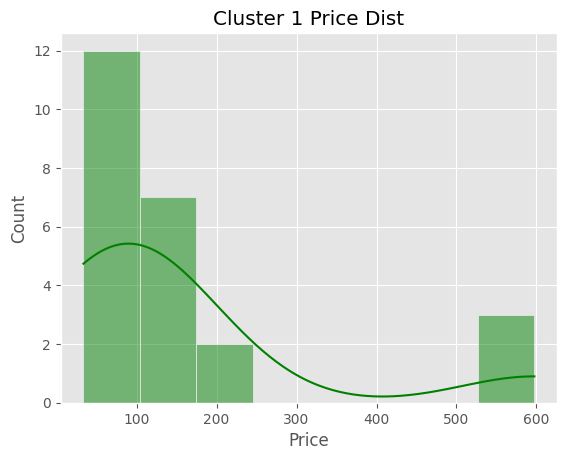

In [64]:
sns.histplot(df_clean[df_clean['Cluster_KM']==1]['Price'], kde=True, color='green')
plt.title('Cluster 1 Price Dist')
plt.show()

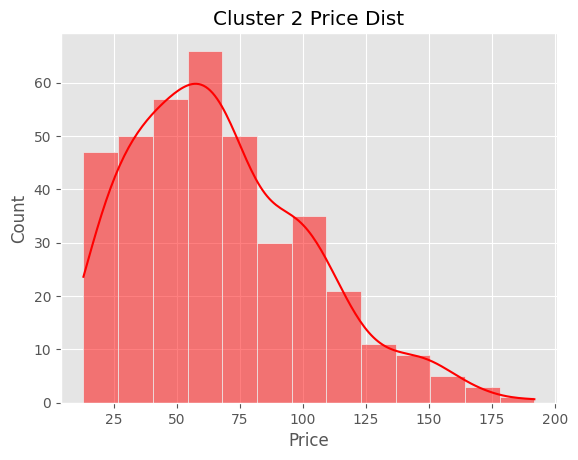

In [65]:
sns.histplot(df_clean[df_clean['Cluster_KM']==2]['Price'], kde=True, color='red')
plt.title('Cluster 2 Price Dist')
plt.show()

In [67]:
print("All clustering steps complete.")
print("End of Fundamentals Notebook ")

All clustering steps complete.
End of Fundamentals Notebook 
